In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv(r'BikeRentingNew.csv')
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
df1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
print(df1['cnt'].unique())

[ 985  801 1349 1562 1600 1606 1510  959  822 1321 1263 1162 1406 1421
 1248 1204 1000  683 1650 1927 1543  981  986 1416 1985  506  431 1167
 1098 1096 1501 1360 1526 1550 1708 1005 1623 1712 1530 1605 1538 1746
 1472 1589 1913 1815 2115 2475 2927 1635 1812 1107 1450 1917 1807 1461
 1969 2402 1446 1851 2134 1685 1944 2077  605 1872 2133 1891  623 1977
 2132 2417 2046 2056 2192 2744 3239 3117 2471 2703 2121 1865 2210 2496
 1693 2028 2425 1536 2227 2252 3249 3115 1795 2808 3141 1471 2455 2895
 3348 2034 2162 3267 3126  795 3744 3429 3204 3944 4189 1683 4036 4191
 4073 4400 3872 4058 4595 5312 3351 4401 4451 2633 4433 4608 4714 4333
 4362 4803 4182 4864 4105 3409 4553 3958 4123 3855 4575 4917 5805 4660
 4274 4492 4978 4677 4679 4758 4788 4098 3982 3974 4968 5342 4906 4548
 4833 3915 4586 4966 4460 5020 4891 5180 3767 4844 5119 4744 4010 4835
 4507 4790 4991 5202 5305 4708 4648 5225 5515 5362 4649 6043 4665 4629
 4592 4040 5336 4881 4086 4258 4342 5084 5538 5923 5302 4458 4541 4332
 3784 

In [5]:
temp1 = df1
temp1['Total Rental Bikes Group'] = pd.cut(
    temp1['cnt'], 
    [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], 
    labels=['0-999 total rentals', '1000-1999 total rentals', '2000-2999 total rentals', '3000-3999 total rentals', '4000-4999 total rentals','5000-5999 total rentals', '6000-6999 total rentals',
            '7000-7999 total rentals','8000-8999 total rentals', '9000-9999 total rentals'],
    right=False
)
temp1


temp1['Groupings'] =  temp1['Total Rental Bikes Group'].replace({'0-999 total rentals': 1, '1000-1999 total rentals': 2, '2000-2999 total rentals': 3, '3000-3999 total rentals': 4, '4000-4999 total rentals': 5, '5000-5999 total rentals': 6, '6000-6999 total rentals': 7,
            '7000-7999 total rentals': 8,'8000-8999 total rentals': 9, '9000-9999 total rentals': 10})

temp1 = temp1.astype({'Groupings':int})
temp1.dtypes

instant                        int64
dteday                        object
season                         int64
yr                             int64
mnth                           int64
holiday                        int64
weekday                        int64
workingday                     int64
weathersit                     int64
temp                         float64
atemp                        float64
hum                          float64
windspeed                    float64
casual                         int64
registered                     int64
cnt                            int64
Total Rental Bikes Group    category
Groupings                      int32
dtype: object

Visualizations


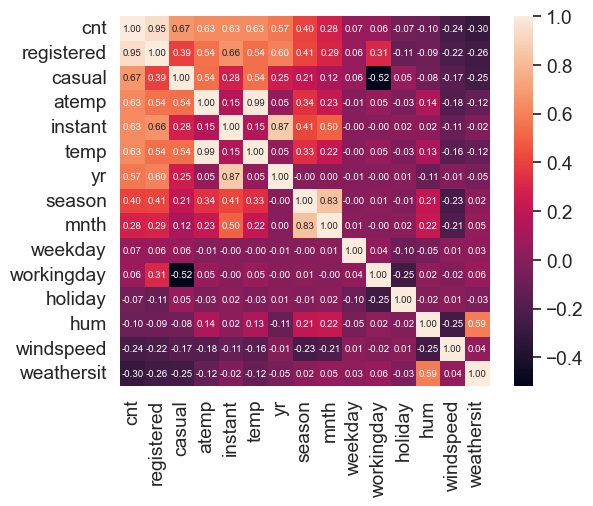

In [7]:
hm = df1.corr()

k = 16 #number of variables for heatmap
cols = hm.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(df1[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

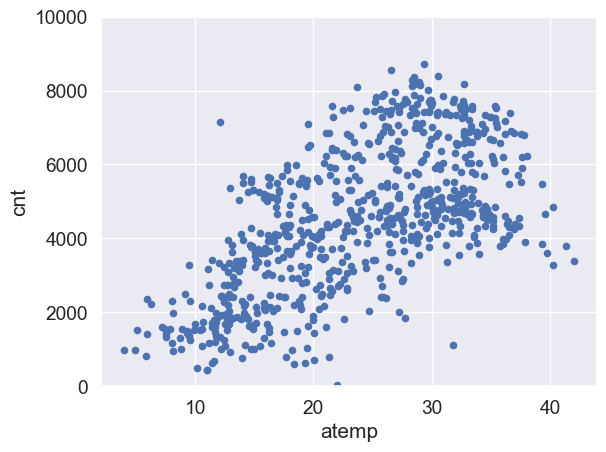

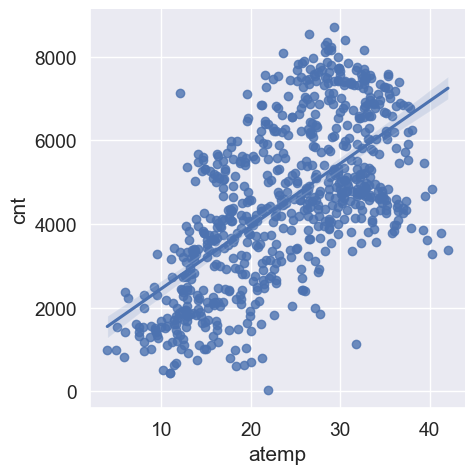

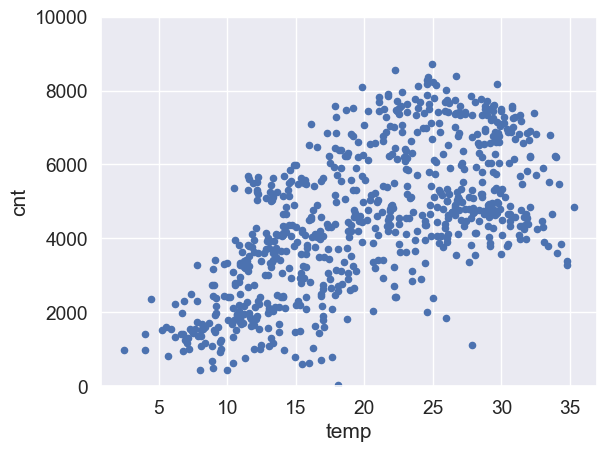

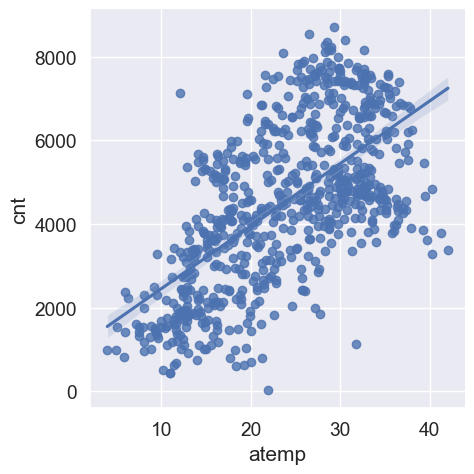

In [8]:
# Scatterplot
var1 = 'atemp'
data = pd.concat([df1['cnt'], df1[var1]], axis=1)
data.plot.scatter(x=var1, y='cnt', ylim=(0,10000))

sb.lmplot(data=df1, x="atemp", y="cnt")

# Scatterplot
var2 = 'temp'
data = pd.concat([df1['cnt'], df1[var2]], axis=1)
data.plot.scatter(x=var2, y='cnt', ylim=(0,10000))
sb.lmplot(data=df1, x="atemp", y="cnt")

<AxesSubplot: xlabel='atemp', ylabel='Groupings'>

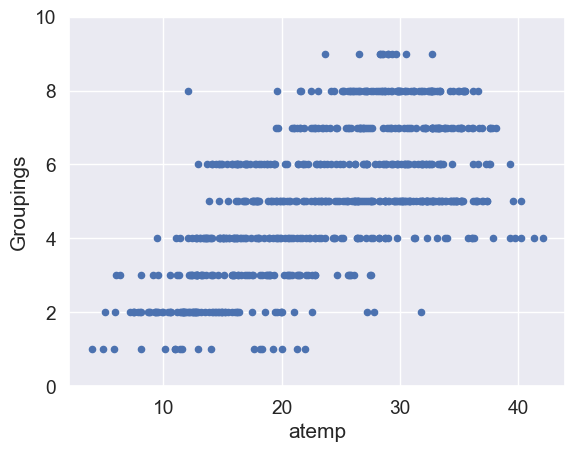

In [9]:
# Scatterplot
var1 = 'atemp'
data = pd.concat([temp1['Groupings'], temp1[var1]], axis=1)
data.plot.scatter(x=var1, y='Groupings', ylim=(0,10))


<AxesSubplot: xlabel='cnt', ylabel='Density'>

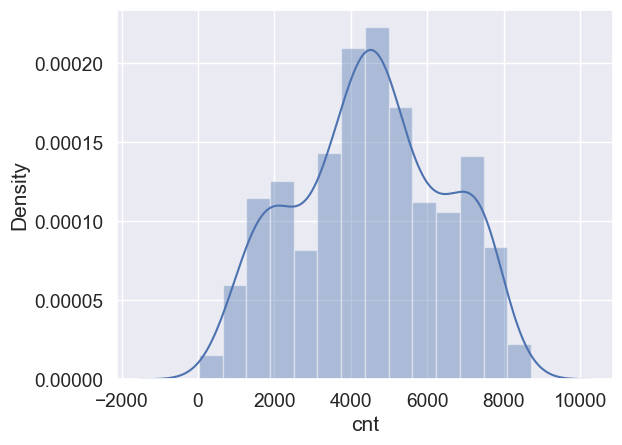

In [11]:
#histogram
sb.distplot(df1['cnt']) 
# sb.distplot(df1['atemp']) 
# sb.distplot(df1['temp']) 
# sb.distplot(df1['casual']) 
# sb.distplot(df1['registered'])
# sb.distplot(df1['season']) 

In [12]:
# Scatterplot
var1 = 'registered'
data = pd.concat([df2['cnt'], df2[var1]], axis=1)
data.plot.scatter(x=var1, y='cnt', ylim=(0,10000))
sb.lmplot(data=df2, x="registered", y="cnt")

NameError: name 'df2' is not defined

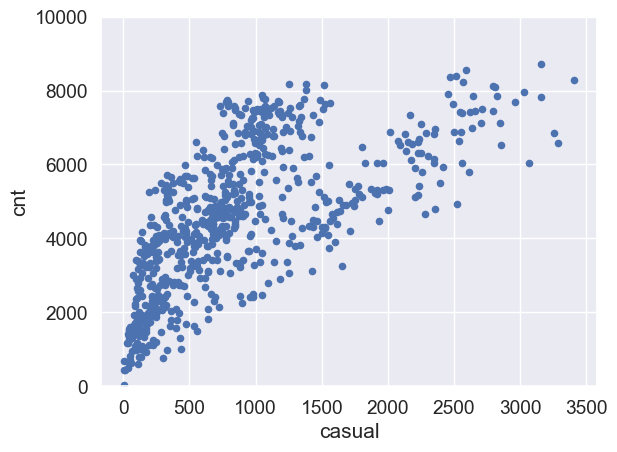

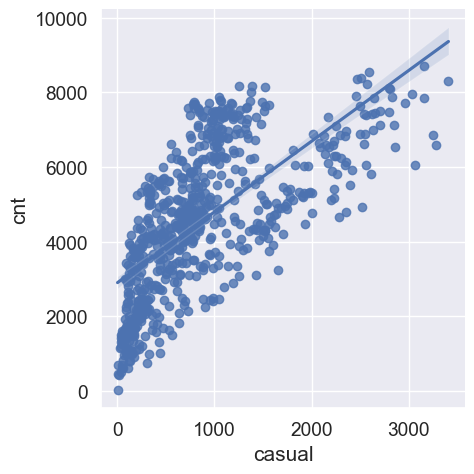

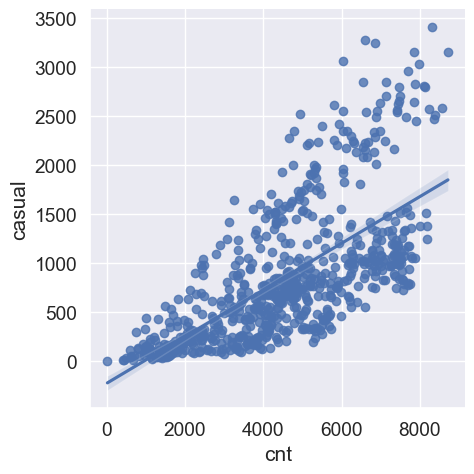

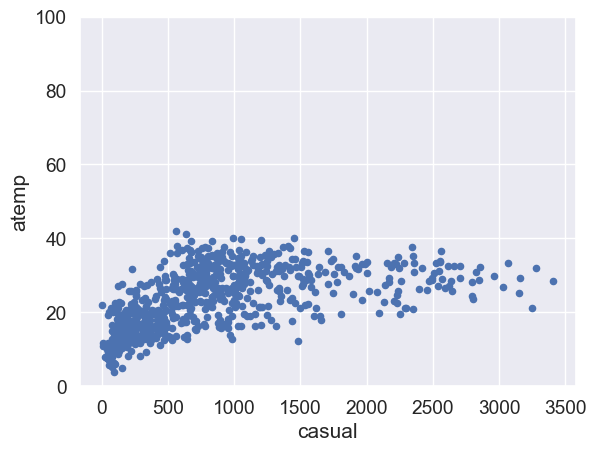

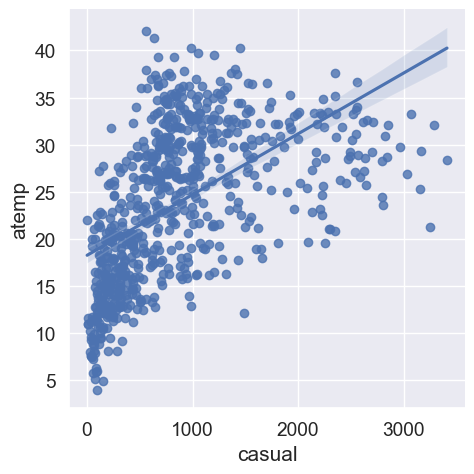

In [13]:
var2 = 'casual'
data = pd.concat([df1['cnt'], df1[var2]], axis=1)
data.plot.scatter(x=var2, y='cnt', ylim=(0,10000))
sb.lmplot(data=df1, x="casual", y="cnt")
sb.lmplot(data=df1, x="cnt", y="casual")

var3 = 'casual'
data = pd.concat([df1['atemp'], df1[var3]], axis=1)
data.plot.scatter(x=var3, y='atemp', ylim=(0,100))
sb.lmplot(data=df1, x="casual", y="atemp")

<AxesSubplot: xlabel='season', ylabel='cnt'>

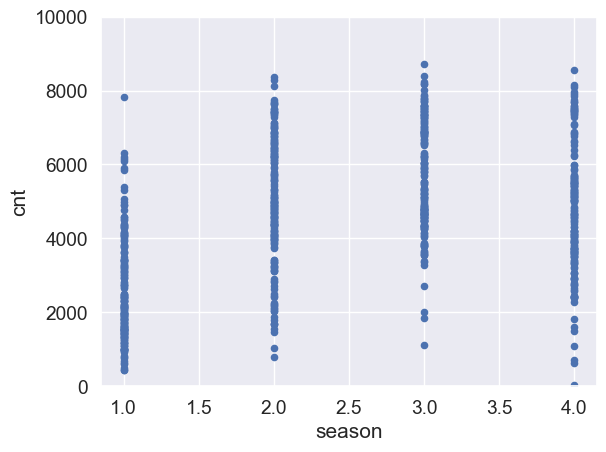

In [14]:
var2 = 'season'
data = pd.concat([df1['cnt'], df1[var2]], axis=1)
data.plot.scatter(x=var2, y='cnt', ylim=(0,10000))

<AxesSubplot: xlabel='season', ylabel='cnt'>

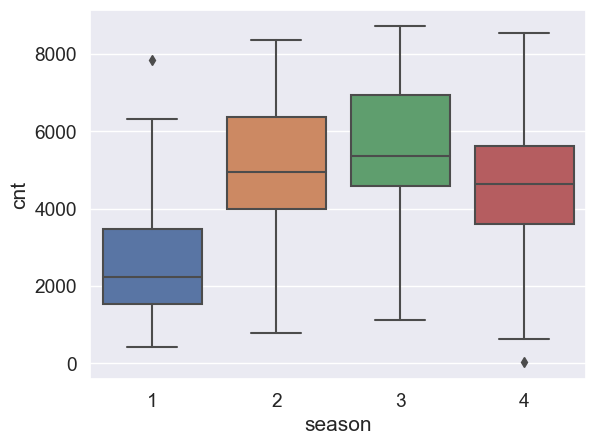

In [15]:
sb.boxplot(data=df1, x="season", y="cnt")